In [5]:
#1 - importar as bibliotecas
#pandas -> vou transformar a tabela
import pandas as pd
#matplotlib -> para plotar o gráfico
import matplotlib.pyplot as plt

In [37]:
#2 -  Ler o arquivo .csv
df = pd.read_csv('IEA Global EV Data 2024.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [39]:
#3 - apresentar informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [41]:
print(df.shape[0])#verificar quantidade de linhas totais na tabela
df.isnull().sum()#verifica se tem linhas vazias e conta a quantidade
df.duplicated().sum() # somas as linhas duplicadas da tabela

12654


0

In [45]:
df.columns
df.columns = ['Região', 'Categoria', 'Parâmetro', 'Tipo','Trem de Força','Ano','Unidade','Valor']
df.columns

Index(['Região', 'Categoria', 'Parâmetro', 'Tipo', 'Trem de Força', 'Ano',
       'Unidade', 'Valor'],
      dtype='object')

In [47]:
#visualizar os valores numa coluna
df['Unidade'].unique()

array(['percent', 'Vehicles', 'charging points', 'GWh',
       'Milion barrels per day', 'Oil displacement, million lge'],
      dtype=object)

In [59]:
#TRADANDO OS DADOS PARA TRABALAHAR COM ELES

#criando um dataframe para selecionar apenas veiculos
df_vehicles = df.loc[df['Unidade'] == 'Vehicles']

df_vehicles['Unidade'].unique()


#excluindo valores

# Textos específicos para remover
#textos_especificos = ['percent', 'charging points']

# padrão de expressão regular para os textos específicos
#padrão = '|'.join(textos_especificos)
#percent = 'percent'
#charging_points = 'charging points'
#df_filtrado = df[~df['Unidade'].str.contains(padrão, case=False, na=False)]
#df_filtrado.head(80)
#df = df_filtrado
#df.info()
#df_filtrado = df[~df['Unidade'].str.contains(charging_points, case=False, na=False)]
#df_filtrado.head(80)

array(['Vehicles'], dtype=object)

In [57]:
df_vehicles['Tipo'].value_counts()

Tipo
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

In [79]:
print(df_vehicles.shape[0])
print(len(valores_etiquetas))
print(len(etiquetas))

6842
4
1


In [101]:
#plotar um gráfico do tipo "pie" verificando a contagem de cada tipo de veículos (coluna Tipo).
conta_tipo = df.groupby('Tipo')['Valor'].sum()
conta_tipo = df['Tipo'].value_counts()
print (conta_tipo)

#etiquetas = df_vehicles['Unidade'].unique()
#valores_etiquetas = df_vehicles['Tipo'].value_counts()

Tipo
Cars      4706
Buses     2696
Vans      2568
Trucks    1766
EV         918
Name: count, dtype: int64


In [81]:
#print(len(valores_etiquetas))
#print(len(etiquetas))

4
1


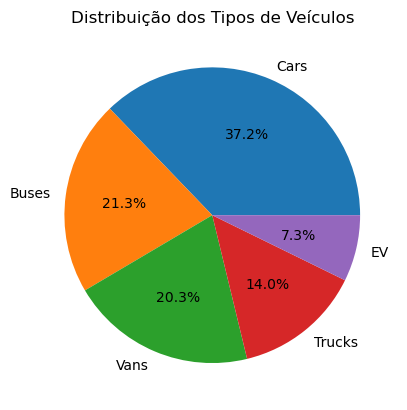

In [103]:
# gráfico de pizza
plt.pie(conta_tipo, labels=conta_tipo.index, autopct='%1.1f%%')
plt.title('Distribuição dos Tipos de Veículos')
plt.show()

In [75]:

df_vehicles['Valor'].dtype

df_vehicles.groupby('Região')['Valor'].sum()
#conta_reg = df['Região'].value_counts()
#print (conta_reg)

Região
Australia               5.788320e+05
Austria                 8.719660e+05
Belgium                 1.687010e+06
Brazil                  2.649470e+05
Bulgaria                4.623000e+03
Canada                  2.416440e+06
Chile                   1.445800e+04
China                   1.148052e+09
Colombia                1.602300e+04
Costa Rica              2.763100e+04
Croatia                 7.557000e+03
Cyprus                  2.260000e+03
Czech Republic          3.430000e+04
Denmark                 1.102561e+06
EU27                    3.324256e+07
Estonia                 4.585000e+03
Europe                  5.937754e+08
Finland                 7.427230e+05
France                  6.787772e+06
Germany                 1.020111e+07
Greece                  1.053560e+05
Hungary                 4.203500e+04
Iceland                 1.897660e+05
India                   6.341878e+07
Ireland                 8.857000e+04
Israel                  4.821870e+05
Italy                   1.86004

In [107]:
# número de veículos por região
df_conta = df_vehicles.groupby('Região')['Valor'].sum().reset_index(name='Total_valor')


df_ordena = df_conta.sort_values(by='Total_valor', ascending=False)

# 10 principais regiões
top_10 = df_ordena.head(10)
print (top_10)

               Região   Total_valor
51              World  2.520120e+09
7               China  1.148052e+09
16             Europe  5.937754e+08
48                USA  4.112801e+08
38  Rest of the world  3.089968e+08
23              India  6.341878e+07
14               EU27  3.324256e+07
19            Germany  1.020111e+07
18             France  6.787772e+06
50     United Kingdom  6.283637e+06


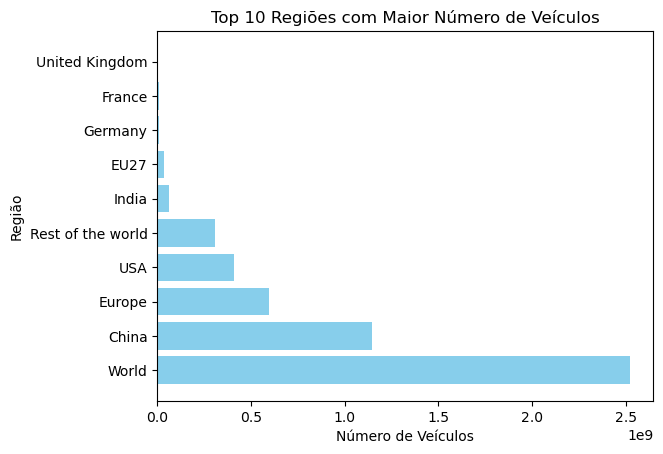

In [111]:
#gráfico de barras
plt.barh(top_10['Região'], top_10['Total_valor'], color='skyblue')
plt.xlabel('Número de Veículos')
plt.ylabel('Região')
plt.title('Top 10 Regiões com Maior Número de Veículos')
plt.show()